In [1]:
import tensorflow as tf
from tensorflow import keras
print("{} version of tensorflow imported, {} version of keras imported" .format(tf.__version__, keras.__version__))

2.0.0 version of tensorflow imported, 2.2.4-tf version of keras imported


## Using Keras to load the dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train_full.dtype


dtype('uint8')

We have got the Training and Test set created. We will now create a validation set which is part of the training set.
Also, since we will used the Gradient Descent to train the neural network, we will have to scale the inputs. 
Since, the inputs are pixel intensities ranging from 0-255, in order to bring them in the range of 0-1, we will have to divide each of the pixel value with 255. We will also have to convert the pixel intensities to float.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

List of classes to know what are the target labels

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[100]]

'Pullover'

## Creating the model using Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
[model.layers[i].name for i in range(len(model.layers))]

['flatten', 'dense', 'dense_1', 'dense_2']

In [12]:
[[model.layers[i].name, model.layers[i].get_weights()] for i in range(len(model.layers))]

[['flatten', []],
 ['dense', [array([[ 0.01103403,  0.04434378,  0.03896169, ...,  0.05682696,
            0.01666081, -0.06307925],
          [ 0.04137695,  0.02017158, -0.0524495 , ..., -0.05435629,
           -0.04163656, -0.06914831],
          [-0.05953028,  0.06859323, -0.03765803, ..., -0.00387718,
           -0.05555655,  0.00206447],
          ...,
          [-0.05799817, -0.06432664, -0.02465606, ..., -0.00917716,
            0.04229499,  0.06895243],
          [ 0.04611024, -0.00611168,  0.05932225, ..., -0.06335   ,
            0.0591003 , -0.00551903],
          [ 0.00032205,  0.00456452, -0.03880661, ...,  0.02601946,
           -0.0665357 , -0.05782134]], dtype=float32),
   array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
weights, biases = model.layers[1].get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

In [16]:
X_train.shape

(55000, 28, 28)

## Compiling the model

Compiling the model means, we specify the loss function, the optimizer to be used and the accuracy

In [17]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer= "sgd",
             metrics = ['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 5s 100us/sample - loss: 0.7211 - accuracy: 0.7676 - val_loss: 0.5329 - val_accuracy: 0.8148
Epoch 2/50
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4863 - accuracy: 0.8315 - val_loss: 0.4590 - val_accuracy: 0.8492
Epoch 3/50
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4414 - accuracy: 0.8463 - val_loss: 0.4287 - val_accuracy: 0.8544
Epoch 4/50
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4144 - accuracy: 0.8541 - val_loss: 0.4023 - val_accuracy: 0.8626
Epoch 5/50
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3948 - accuracy: 0.8607 - val_loss: 0.3908 - val_accuracy: 0.8614
Epoch 6/50
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3797 - accuracy: 0.8660 - val_loss: 0.3881 - val_accuracy: 0.8602
Epoch 7/50
55000/55000 [============================

In [19]:
history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [20]:
history.history

{'loss': [0.7211241779674183,
  0.4862950812513178,
  0.4414390807585283,
  0.41436413821307094,
  0.3947541123823686,
  0.37974758879054676,
  0.36613386570106854,
  0.35316292977116326,
  0.3422378773385828,
  0.332805853730982,
  0.3243192279989069,
  0.3157436420418999,
  0.30816979680278084,
  0.30150135680328716,
  0.2946002359780398,
  0.28974515864632344,
  0.28310191738822243,
  0.27752200757373463,
  0.2709833515470678,
  0.26705567577535455,
  0.2622966506394473,
  0.25724440471475774,
  0.2516901705232534,
  0.24828329935724086,
  0.243534786205942,
  0.23877690026434986,
  0.23514926939227365,
  0.23124384375918997,
  0.22678247520923614,
  0.22253491405790501,
  0.21975084804404865,
  0.21634617507674478,
  0.21160417435385964,
  0.2077628498565067,
  0.2046637885310433,
  0.2011087523216551,
  0.19958697123798458,
  0.19582072845155543,
  0.1919165928840637,
  0.1892967010032047,
  0.18529160790226676,
  0.18260943221829154,
  0.1802610706665299,
  0.17646819172447378,
 

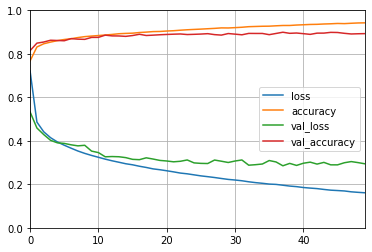

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
#plt.ylim(0,1)
plt.show()

In [30]:
x_test_scaled = x_test/255.0

model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33087478677034377, 0.8876]

## Using model to make predictions

In [105]:
X_new = x_test_scaled
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [106]:
y_pred = model.predict_classes(X_new)
y_pred

for i in range(len(X_new)):
    print("Item number : {}, Predicted: {}, Actual: {}" .format(i, class_names[y_pred[i]], class_names[y_test[i]]))
    

Item number : 0, Predicted: Ankle boot, Actual: Ankle boot
Item number : 1, Predicted: Pullover, Actual: Pullover
Item number : 2, Predicted: Trouser, Actual: Trouser
Item number : 3, Predicted: Trouser, Actual: Trouser
Item number : 4, Predicted: Shirt, Actual: Shirt
Item number : 5, Predicted: Trouser, Actual: Trouser
Item number : 6, Predicted: Coat, Actual: Coat
Item number : 7, Predicted: Shirt, Actual: Shirt
Item number : 8, Predicted: Sandal, Actual: Sandal
Item number : 9, Predicted: Sneaker, Actual: Sneaker
Item number : 10, Predicted: Coat, Actual: Coat
Item number : 11, Predicted: Sandal, Actual: Sandal
Item number : 12, Predicted: Sandal, Actual: Sneaker
Item number : 13, Predicted: Dress, Actual: Dress
Item number : 14, Predicted: Coat, Actual: Coat
Item number : 15, Predicted: Trouser, Actual: Trouser
Item number : 16, Predicted: Pullover, Actual: Pullover
Item number : 17, Predicted: Pullover, Actual: Coat
Item number : 18, Predicted: Bag, Actual: Bag
Item number : 19, P

Item number : 1170, Predicted: Sneaker, Actual: Sneaker
Item number : 1171, Predicted: Bag, Actual: Bag
Item number : 1172, Predicted: Coat, Actual: Coat
Item number : 1173, Predicted: Pullover, Actual: Pullover
Item number : 1174, Predicted: Coat, Actual: Shirt
Item number : 1175, Predicted: Sandal, Actual: Sandal
Item number : 1176, Predicted: Sandal, Actual: Sandal
Item number : 1177, Predicted: Shirt, Actual: Shirt
Item number : 1178, Predicted: Coat, Actual: Coat
Item number : 1179, Predicted: Sandal, Actual: Sandal
Item number : 1180, Predicted: Sandal, Actual: Sandal
Item number : 1181, Predicted: Bag, Actual: Bag
Item number : 1182, Predicted: Trouser, Actual: Trouser
Item number : 1183, Predicted: Trouser, Actual: Trouser
Item number : 1184, Predicted: Sneaker, Actual: Sneaker
Item number : 1185, Predicted: Coat, Actual: Coat
Item number : 1186, Predicted: Shirt, Actual: Shirt
Item number : 1187, Predicted: Ankle boot, Actual: Ankle boot
Item number : 1188, Predicted: Shirt, A

Item number : 2808, Predicted: Ankle boot, Actual: Ankle boot
Item number : 2809, Predicted: Sneaker, Actual: Sneaker
Item number : 2810, Predicted: Dress, Actual: Dress
Item number : 2811, Predicted: Sneaker, Actual: Sneaker
Item number : 2812, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 2813, Predicted: Trouser, Actual: Trouser
Item number : 2814, Predicted: Dress, Actual: Dress
Item number : 2815, Predicted: Sandal, Actual: Sandal
Item number : 2816, Predicted: Ankle boot, Actual: Ankle boot
Item number : 2817, Predicted: T-shirt/top, Actual: Dress
Item number : 2818, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 2819, Predicted: Sandal, Actual: Sandal
Item number : 2820, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 2821, Predicted: Sandal, Actual: Sandal
Item number : 2822, Predicted: Bag, Actual: Bag
Item number : 2823, Predicted: Sneaker, Actual: Sneaker
Item number : 2824, Predicted: Coat, Actual: Dress
Item number : 2825, Predicted: Shirt,

Item number : 4893, Predicted: T-shirt/top, Actual: Shirt
Item number : 4894, Predicted: Sandal, Actual: Sandal
Item number : 4895, Predicted: Coat, Actual: Coat
Item number : 4896, Predicted: T-shirt/top, Actual: Shirt
Item number : 4897, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 4898, Predicted: Sandal, Actual: Sandal
Item number : 4899, Predicted: Sneaker, Actual: Sneaker
Item number : 4900, Predicted: Bag, Actual: Bag
Item number : 4901, Predicted: Coat, Actual: Coat
Item number : 4902, Predicted: Bag, Actual: Bag
Item number : 4903, Predicted: Dress, Actual: Bag
Item number : 4904, Predicted: Sneaker, Actual: Sneaker
Item number : 4905, Predicted: Coat, Actual: Coat
Item number : 4906, Predicted: Ankle boot, Actual: Ankle boot
Item number : 4907, Predicted: Dress, Actual: Coat
Item number : 4908, Predicted: Ankle boot, Actual: Ankle boot
Item number : 4909, Predicted: Shirt, Actual: Shirt
Item number : 4910, Predicted: Ankle boot, Actual: Ankle boot
Item number : 4

Item number : 7045, Predicted: Bag, Actual: Bag
Item number : 7046, Predicted: Sneaker, Actual: Sneaker
Item number : 7047, Predicted: Sneaker, Actual: Ankle boot
Item number : 7048, Predicted: Dress, Actual: Dress
Item number : 7049, Predicted: Coat, Actual: Pullover
Item number : 7050, Predicted: Sneaker, Actual: Sneaker
Item number : 7051, Predicted: Ankle boot, Actual: Ankle boot
Item number : 7052, Predicted: Pullover, Actual: Pullover
Item number : 7053, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 7054, Predicted: Trouser, Actual: Trouser
Item number : 7055, Predicted: Trouser, Actual: Trouser
Item number : 7056, Predicted: Trouser, Actual: Trouser
Item number : 7057, Predicted: Coat, Actual: Coat
Item number : 7058, Predicted: Bag, Actual: Bag
Item number : 7059, Predicted: Shirt, Actual: T-shirt/top
Item number : 7060, Predicted: Bag, Actual: Bag
Item number : 7061, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 7062, Predicted: Sandal, Actual: Ankle bo

Item number : 9149, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 9150, Predicted: Ankle boot, Actual: Ankle boot
Item number : 9151, Predicted: Dress, Actual: Dress
Item number : 9152, Predicted: Sneaker, Actual: Sneaker
Item number : 9153, Predicted: T-shirt/top, Actual: T-shirt/top
Item number : 9154, Predicted: Shirt, Actual: Pullover
Item number : 9155, Predicted: Dress, Actual: Dress
Item number : 9156, Predicted: Sandal, Actual: Sandal
Item number : 9157, Predicted: Shirt, Actual: Shirt
Item number : 9158, Predicted: Coat, Actual: Coat
Item number : 9159, Predicted: Dress, Actual: Dress
Item number : 9160, Predicted: Pullover, Actual: Coat
Item number : 9161, Predicted: Shirt, Actual: Shirt
Item number : 9162, Predicted: Ankle boot, Actual: Ankle boot
Item number : 9163, Predicted: Bag, Actual: Bag
Item number : 9164, Predicted: Bag, Actual: Bag
Item number : 9165, Predicted: T-shirt/top, Actual: Dress
Item number : 9166, Predicted: Pullover, Actual: Pullover
Item nu

In [107]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, y_pred)

tn = mcm[:,0,0]
fp = mcm[:,0,1]
fn = mcm[:,1,0]
tp = mcm[:,1,1]

In [114]:
precision = tp/(tp+fp)
precision.round(2)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+ recall)

precision.round(2), recall.round(2), f_score.round(2)
for i, name in enumerate(class_names):
    print("{} : Precision = {}, Recall = {}, F1-Score = {}" .format(name, precision.round(2)[i], recall.round(2)[i], f_score.round(2)[i]))

T-shirt/top : Precision = 0.81, Recall = 0.88, F1-Score = 0.84
Trouser : Precision = 0.98, Recall = 0.98, F1-Score = 0.98
Pullover : Precision = 0.75, Recall = 0.87, F1-Score = 0.81
Dress : Precision = 0.91, Recall = 0.87, F1-Score = 0.89
Coat : Precision = 0.84, Recall = 0.78, F1-Score = 0.81
Sandal : Precision = 0.96, Recall = 0.97, F1-Score = 0.97
Shirt : Precision = 0.75, Recall = 0.67, F1-Score = 0.71
Sneaker : Precision = 0.94, Recall = 0.96, F1-Score = 0.95
Bag : Precision = 0.97, Recall = 0.96, F1-Score = 0.96
Ankle boot : Precision = 0.97, Recall = 0.94, F1-Score = 0.96
